# Suivi de position en mer (suite probabiliste)

Ce projet suit directement le travail réalisé dans le projet d'équations différentielles. Vous êtes libres d'utiliser la correction ou bien vos propres fonctions.
L'objectif est d'illustrer comment les méthodes probabilistes vont nous permettre d'associer une incertitude aux variables d'état estimées, notamment lorsque les observations ne sont pas disponibles à la même fréquence temporelle que le pas de discrétisation du modèle numérique.

## Filtrage de Kalman probabiliste

On considère un modèle dynamique discret, dit *espace-état probabiliste* linéaire de la forme suivante :
\begin{align*}
X_t &= A X_{t-1} + \varepsilon_t
Y_t &= B X_t + \eta_t
\end{align*}
où $X_t$ est un vecteur aléatoire de $\mathbb{R}^n$ qui représente l'état du système au temps $t$, $\varepsilon_t$ est un vecteur aléatoire de $\mathbb{R}^n$ qui représente l'erreur de modélisation au temps $t$, $A$ est la matrice d'évolution ou de transition du système, $Y_t \in \mathbb{R}^d$ est l'observation au temps $t$, avec $B$ la matrice d'observation et $\eta_t\in \mathbb{R}^d$ l'erreur d'observation au temps $t$. On suppose connue la loi de $X_0$ et que les erreurs sont indépendantes de l'état du système.

La première équation sera dite d'évolution et la seconde d'observation. 

### Construction du filtre de Kalman probabiliste (cas linéaire)

**Question 1.** Sous l'hypothèse que $\varepsilon_t \sim \mathcal{N}(0,Q)$ et $\eta_t\sim\mathcal{N}(0,R)$, avec $Q$ et $R$ des matrices symétriques définies positives, montrer qu'on peut réécrire ces deux équations sous la forme :
\begin{align*}
X_t| X_{t-1} =x_{t-1} &\sim \mathcal{N}(A x_{t-1}, Q)
Y_t| X_t= x_t &\sim \mathcal{N}(B x_t, R)
\end{align*}

On rappelle qu'une combinaison linéaire de variables gaussiennes suit une loi gaussienne qui est entièrement déterminée par ses moments d'ordre 1 et 2 (espérance et matrice de covariance).

**Question 2.** En supposant que $X_0 \sim \mathcal{N}(m_0,P_0)$, montrer que 
\begin{align*}
X_1 &\sim \mathcal{N}(m_1 = A m_0,P_1 = A P_0 A^t + Q) 
\text{puis que } X_1|Y_1 = y_1 &\sim \mathcal{N}(m_1+P_1 B^t (B P_1 B^t +R)^{-1}(y_1 - B m_1),P_1 - P_1 B^t(B P_1 B^t +R)^{-1}B P_1).
\end{align*} 
On pourra exprimer la loi du vecteur $(X_1,Y_1)$.

On peut itérer le procédé et résumer comme suit les deux étapes du filtre de Kalman :

* Etape de prédiction : 
\begin{align*}
m_t^p &= A m_{t-1} 
P_t^p &= A P_{t} A^t + Q
\end{align*}

* Etape de mise à jour :
\begin{align*}
m_t &= m_t^p+P_t^p B^t (B P_t^p B^t +R)^{-1}(y_1 - B m_t^p)
P_t &= P_t^p - P_t^p B^t(B P_t^p B^t +R)^{-1}B P_t^p 
\end{align*}

Autrement dit, on fait d'abord évoluer le système selon sa dynamique, puis on le conditionne aux nouvelles observations. L'estimateur de l'état est donné par $m_t = \mathbb{E}(X_t|X_{t-1} =x_{t-1},Y_t = y_t)$ qui est la meilleure approximation de $X_t$ au sens des moindres carrés sachant $X_{t-1} = x_{t-1}$ et $Y_t = y_{t-1}$ (voir chapitre 3 du cours de Probabilités).

L'interprétation probabiliste nous permet en outre d'associer à cet estimateur la loi de probabilité $\mathcal{N}(m_t,P_t)$.

### Application au suivi de la trajectoire du bateau - Filtre de Kalman étendu

Les développements ci-dessus permettent de donner une interprétation probabiliste aux résultats obtenus dans le projet d'équations différentielles. Dans le paragraphe précédent, nous avons décrit le filtre de Kalman dans le cas d'une dynamique linéaire. Dans le cas de la trajectoire du bateau cependant, l'évolution de la position est une fonction non-linéaire des composantes du vecteur d'état. Pour qu'il soit applicable, la version étendue du filtre de Kalman a été implémentée. On peut la résumer en les deux étapes suivantes :

* Etape de prédiction : 
\begin{align*}
m_t^p &= f(t,m_{t-1}) \\
P_t^p &= A_t P_{t-1} A_t^t + Q
\end{align*}

* Etape de mise à jour :
\begin{align*}
m_t &= m_t^p+P_t^p B^t (B P_t^p B^t +R)^{-1}(y_1 - B m_t^p) \\
P_t &= P_t^p - P_t^p B^t(B P_t^p B^t +R)^{-1}B P_t^p 
\end{align*}

La différence avec le cas linéaire est que la dynamique est non linéaire cependant, pour propager les matrices de covariances et maintenir la loi gaussienne, la dynamique est linéarisée. Ainsi, on utilise
\begin{align*}
A_t = \frac{\partial f}{\partial x}(t,m_t) 
B_t = \frac{\partial h}{\partial x}(t,m_t) 
\end{align*}

C'est le filtre de Kalman étendu qui a été implémenté dans le projet d'équations différentielles.

**Question 3.** Interpréter les différentes quantités entrant dans la construction du filtre de Kalman étendu de manière probabiliste en précisant les hypothèses ou approximations effectuées. Proposer une "zone" de confiance à 95% autour du dernier point de la trajectoire. Que se passe-t-il lorsque le pas de discrétisation augmente ?

**Question 1.** 

$ \left(X_t|X_{t-1} = x_{t-1} \right) =  \left(AX_{t-1} + \varepsilon_t|X_{t-1} = x_{t-1}\right) = Ax_{t-1} + \varepsilon_t $


C'est la somme d'une variable gaussienne et d'une constante donc c'est une une variable gaussienne.
              
$ \mathbb{E}[X_t|X_{t-1} = x_{t-1}] = \mathbb{E}[Ax_{t-1} + \varepsilon_t] $

$                                   = \mathbb{E}[Ax_{t-1}] + \mathbb{E}[\varepsilon_t] $ par linéarité de l'espérance

$                                   = A\mathbb{E}[x_{t-1}] + 0 $

$                                   = Ax_{t-1} $

$ Cov(X_t|X_{t-1} = x_{t-1} , X_t|X_{t-1} = x_{t-1}) = Cov(Ax_{t-1} + \varepsilon_t , Ax_{t-1} + \varepsilon_t) $

$                                         = Cov(\varepsilon_t , \varepsilon_t) $ car $Ax_{t-1}$ est une constante

$                                         = Q $



$ Y_t|X_t = x_t = Bx_t + \eta_t $ qui est bien une variable gaussienne  

$ \mathbb{E}[Y_t|X_t = x_t] = \mathbb{E}[Bx_t + \eta_t] $

$                           = B\mathbb{E}[x_t] + \mathbb{E}[\eta_t] $

$                           = Bx_t $

$ Cov(Y_t|X_t = x_t , Y_t|X_t = x_t) = Cov(Bx_t + \eta_t , Bx_t + \eta_t) $

$                                    = Cov(\eta_t , \eta_t) $

$                                    = R $



**Question 2.** En supposant que $X_0 \sim \mathcal{N}(m_0,P_0)$, montrer que 
\begin{align*}
X_1 &\sim \mathcal{N}(m_1 = A m_0,P_1 = A P_0 A^t + Q) 
\text{puis que} X_1|Y_1 = y_1 &\sim \mathcal{N}(m_1+P_1 B^t (B P_1 B^t +R)^{-1}(y_1 - B m_1),P_1 - P_1 B^t(B P_1 B^t +R)^{-1}B P_1).
\end{align*} 

$ X_1 = AX_0 + \varepsilon_1 $ En assumant que $X_0$ est une variable gaussienne, $X_1$ est une combinaison linéaire de variables gaussiennes donc c'est une variable gaussienne.

$\mathbb{E}[X_1] = A\mathbb{E}[X_0] + \mathbb{E}[\varepsilon_1] $

$                = Am_0 + 0 $

$                = Am_0 $
                 
$ Cov(X_1 , X_1) = Cov(AX_0 + \varepsilon_1 , AX_0 + \varepsilon_1) $

$                = Cov(AX_0 , AX_0) + Cov(\varepsilon_1 , \varepsilon_1) + 2Cov(AX_0 , \varepsilon_1) $

$                = ACov(X_0 , X_0)A^t + Q + 0 $ car les erreurs sont indépendantes de l'état du système.

$                = AP_0A^t + Q $


$ X_1|Y_1 = y_1 = X_1|BX_1 + \eta_1 = y_1 $

$ \mathbb{E}[\left(X_1,Y_1\right)] =\left(m_1,Bm_1\right)$

$ Cov(\left(X_1,Y_1\right), \left(X_1,Y_1\right)) = \begin{pmatrix}
                                                   Cov(X_1 , X_1) & Cov(X_1 , Y_1) \\
                                                   Cov(Y_1 , X_1) & Cov(Y_1 , Y_1)
                                                  \end{pmatrix} $
                                                  
$ Cov(X_1 , X_1) = P_1 $

$ Cov(Y_1 , Y_1) = Cov(BX_1 + \eta_1 , BX_1 + \eta_1) $

$                = Cov(BX_1 , BX_1) + Cov(\eta_1 , \eta_1) $

$                = BCov(X_1 , X_1)B^t + R $

$                = BP_1B^t + R $

$ Cov(X_1 , Y_1) = Cov(X_1 , BX_1 + \eta_1) $

$                = Cov(X_1 , BX_1) $

$                = P_1B^t $

$ Cov(\left(X_1,Y_1\right) , \left(X_1,Y_1\right)) = \begin{pmatrix}
                                                   P_1 & P_1B^t \\
                                                   BP_1 & BP_1B^t + R
                                                  \end{pmatrix} $
                                                  
D'après le cours Probabilités III page 13 :
$ X_1|Y_1 = y_1 $ suit une loi normale

$ \mathbb{E}[X_1|Y_1 = y_1] = m_1 + P_1B^t(BP_1B^t + R)^{-1}(y_1-Bm_1) $

$ Cov(X_1|Y_1 = y_1 , X_1|Y_1 = y_1) = P_1 - P_1B^t((BP_1B^t + R)^{-1}BP_1 $

**Question 3.**

### Analyse:

Cherchons un domaine de confiance $D \subset \mathbb{R}^n$ tel que $\mathbb{P}(X_T \in D) \geq 0.95$.

Notons $\tilde{D}$ le translaté de $D$ par $m_T$. Pour simplifier, nous le cherchons sous la forme $\tilde{D}=[-a,a]^n$ où $a>0$.

On a $$\mathbb{P}(X_T \in D) = \int_{y \in D}\frac{1}{(2\pi)^{n/2}\sqrt{\det(P_T)}}\exp\left(-\frac{1}{2}<y,P_T^{-1}y>\right)dy$$

La démarche consiste à chercher à majorer $\det(P_T)$ et $<y,P_T^{-1}y>$.

### Préliminaires:

On fait l'hypothèse que les $P_t$ sont toutes définies positives, et que, comme dans le projet d'équations différentielles, les $A_t,B_t$ sont uniformément bornées par $M$.

Pour une matrice $A$ on note $f_A = \frac{<\cdot,A\cdot>}{\|\cdot\|^2}$ (où $<\cdot,\cdot>$ est le produit scalaire canonique de $\mathbb{R}^n$). Cette application est linéaire par rapport à $A$.

Pour $A$ définie positive, on note $minA,maxA$ ses valeurs propres extrémales. On a $0 < minAI_n \leq A \leq maxAI_n$ donc $minA \leq f_A \leq maxA$ ainsi que, sachant $A^{-1}>0$, $\frac{1}{maxA} \leq A^{-1} \leq \frac{1}{minA} \, (1)$.

### Lemme:

Soient $A>0,B>0,C$ des matrices carrées réelles, alors $$CAC^{\top} + B >0$$

Démonstration: 

Soit $X \in \mathbb{R}^n$, $<X,CAC^{\top}X> = <C^{\top}X,AC^{\top}X> \geq 0$ donc $$<X,(CAC^{\top}+B)X> = <C^{\top}X,AC^{\top}X> + <X,BX> \geq 0$$ 

et $B>0$ donc cette quantité est nulle si et seulement si $X=0$.

A présent, cherchons une suite de majorants et minorants des $f_{P_t}$.

On a $$f_{P_t} = f_{P_t^p} - f_{T_t^{-1}}(B_tP_t^p\cdot)$$

où on a défini $T_t = B_tP_t^pB_t^{\top}+R > 0$ par le lemme.

Donc $f_{P_t} \leq f_{P_t^p} \leq maxP_t^p$ d'une part, et d'autre part, pour $X \in \mathbb{R}^n$:

$$f_{T_t^{-1}}(B_tP_t^pX) = <B_tP_t^pX,T_t^{-1}B_tP_t^pX>/\|X\|^2
\leq maxT_t^{-1}\|B_tP_t^pX\|^2/\|X\|^2
\leq maxT_t^{-1}|||B_t|||^2|||P_t^p|||^2$$ 

par sous-multiplicativité des normes d'opérateur. 

Donc $$f_{P_t} \geq minP_t^p - maxT_t^{-1}|||B_t|||^2|||P_t^p|||^2 = minP_t^p - maxT_t^{-1}|||B_t|||^2\left(minP_t^p\right)^2$$

Nous avons $f_{T_t} = f_{P_t}(B_t^{\top}\cdot) + f_{R} \leq |||B_t|||^2maxP_t + maxR$

et $f_{T_t} \geq minR$ donc $$f_{T_t^{-1}} \leq \frac{1}{minR}$$

Puis $f_{P_t^p} = f_{P_{t-1}}(A_t^{\top}\cdot) + f_{Q} \leq |||A_t|||^2maxP_{t-1} + maxQ$

et $f_{P_t^p} \geq minQ$

On en déduit $$f_{P_t} \leq M^2maxP_{t-1} + maxQ$$ et $$f_{P_t} \geq minQ - M^2|||P_t^p|||^2\frac{1}{minR} \geq minQ - \frac{M^2}{minR}\left(M^2maxP_{t-1}+maxQ\right)^2$$

On note $x_t$ une suite arithmético-géométrique vérifiant: $x_0=maxP_0$ et $$x_{t+1}=M^2x_t+maxQ$$ dont l'expression générale est $$x_t=M^{2t}(x_0-\frac{maxQ}{1-M^2})+\frac{maxQ}{1-M^2}=M^{2t}(maxP_0-\frac{maxQ}{1-M^2})+\frac{maxQ}{1-M^2}$$ (rendu possible en choisissant $M>1$)

On a alors par construction $$f_{P_t} \leq x_t$$ et donc aussi $$f_{P_t} \geq minQ - \frac{M^2}{minR}x_t^2 \hat{=} z_t$$

comme $maxP_t$ et $minP_t$ sont des valeurs atteintes par $f_{P_t}$ (en des vecteurs propres réels associés), on a : $$z_t \leq minP_t \leq f_{P_t} \leq maxP_t \leq x_t$$

Reprenons

On sait que $P_T > 0 $ donc $\det(P_T) \leq (maxP_T)^n \leq x_T^n $ et que $$<y,P_T^{-1}y> \leq \frac{1}{minP_T}\|y\|^2 \leq \frac{1}{z_T}\|y\|^2$$

Donc par positivité de l'intégrale, par croissance de l'exponentielle:

$$\mathbb{P}(X_T \in D) = \frac{1}{(2\pi x_T)^{n/2}}\int_{y \in D}\exp\left(-\frac{1}{2z_T}\|y\|^2\right)dy$$

Notons $K = 2z_T$ et $H=(2\pi x_T)^{n/2}$, on a $$\mathbb{P}(X_T \in D) = \frac{1}{H}\int_{y \in D}\exp\left(-\frac{1}{K}\|y\|^2\right)dy$$

On remarque que $$\int_{y \in D}\exp\left(-\frac{1}{K}\|y\|^2\right)dy = \left(\int_{x=-a}^a \exp\left(-\frac{1}{K}x^2\right)dy\right)^n \geq \left(2a\exp\left(-\frac{1}{K}a^2\right)\right)^n$$

On cherche alors $a$ satisfaisant $$\frac{1}{H}(2a)^n\exp\left(-\frac{n}{K}a^2\right) \geq 0.95$$

c'est à dire pour synthétiser: $$\frac{(2a)^n\exp\left(-\frac{n}{2minQ - \frac{M^2}{minR}\left(M^{2T}(maxP_0-\frac{maxQ}{1-M^2})+\frac{maxQ}{1-M^2}\right)^2}a^2\right)}{(2\pi)^{n/2}\left(M^{2T}(maxP_0-\frac{maxQ}{1-M^2})+\frac{maxQ}{1-M^2}\right)^{n/2}} \geq 0.95$$

## Filtrage particulaire

En raison de la contrainte ou de l'approximation linéaire imposée, l'emploi du filtre de Kalman est limitant lorsque la dynamique est fortement non linéaire et/ou lorsque la fréquence d'observation est faible en regard de la dynamique. On peut voir qu'il est en réalité une solution particulière au problème de filtrage bayésien que nous nous proposons maintenant d'étudier.

### Filtrage bayésien

On considère maintenant un modèle espace-état plus général de la forme suivante :

\begin{align*}
X_t &= f(X_{t-1},\varepsilon_t), \\
Y_t &= h(X_t,\eta_t),
\end{align*}

avec les mêmes notations que dans la partie précédente. $f$ et $h$ représentent désormais respectivement une dynamique et une fonction d'observation possiblement non-linéaires. A noter que les erreurs ne sont plus nécessairement additives. De même que précédemment, on supposera que $X_0$ est de loi de probabilité connue. On suppose que tous les vecteurs aléatoires admettent des densités.

On peut remarquer dans un premier temps que la loi de $X_t|X_{t-1} = x_{t-1}, \ldots, X_0 = x_0$ est identique à la loi de $X_t|X_{t-1} = x_{t-1}$, en d'autres termes que la loi de $X_t$ sachant tous les points précédents de la trajectoire est entièrement caractérisée par la connaissance de $X_{t-1} = x_{t-1}$. En terme de densités de probabilités, on a :
\begin{equation*}
f_{X_t|X_{t-1} = x_{t-1}, \ldots, X_0 = x_0}(x) = f_{X_t|X_{t-1} = x_{t-1}}(x).
\end{equation*}
On appelle cette propriété la *propriété de Markov*. De plus, de manière évidente, on a :
\begin{equation*}
f_{Y_t|X_t = x_t, Y_{t-1} = y_{t-1}, \ldots, Y_0 = y_0}(y) = f_{Y_t|X_t = x_t}(y),
\end{equation*}
ce qui signifie que l'observation au temps $t$ est *conditionnellement indépendante* des observations passées, sachant $X_t = x_t$.

Dans ce cadre, on va chercher à caractériser la loi de la séquence $X_{1:T} = (X_1,\ldots,X_T)$ (la *trajectoire* de l'état du système), sachant les observations $Y_{1:T} = (Y_1,\ldots,Y_T)$, où plus simplement la loi de l'état du système à l'instant $t$ $X_t$ sachant les observations $Y_{1:t}$.


**Question 1.** En utilisant la propriété de Markov et la formule de Bayes, montrer que :
\begin{equation*}
f_{X_{1:t}|Y_{1:t}=y_{1:t}}(x_{1:t}) = \frac{f_{Y_t|X_t = x_t}(y_t) f_{X_t|X_{t-1}=x_{t-1}}(x_t)f_{X_{1:t-1}|Y_{1:t-1}=y_{1:t-1}}(x_{1:t-1})}{f_{Y_t|Y_{t-1} = y_{t-1}, \ldots, Y_0 = y_0}(y_t)}
\end{equation*}

Cette expression nous montre qu'on peut décomposer séquentiellement la loi conditionnelle de la trajectoire sachant les observations, autrement dit que l'on peut la mettre à jour itérativement.

**Question 2.** En déduire que pour tout $t \in {1,\ldots,T}$, on a 
\begin{equation*}
f_{X_t|Y_{1:t}=y_{1:t}}(x_t) = \frac{f_{Y_t|X_t = x_t}(y_t) f_{X_t|Y_{1:t-1}=y_{1:t-1}}(x_t)}{f_{Y_t|Y_{t-1} = y_{t-1}, \ldots, Y_0 = y_0}(y_t)},
\end{equation*}
où
\begin{equation*}
f_{X_t|Y_{1:t-1}=y_{1:t-1},}(x_t) = \int f_{X_t|X_{t-1}=x_{t-1}}(x_t) f_{X_{t-1}|Y_{1:t-1}=y_{1:t-1}}(x_{t-1}) dx_{t-1}
\end{equation*}
Cette expression nous indique que pour obtenir la loi conditionnelle de $X_t$ sachant toute les observations on peut procéder en deux étapes, de manière similaire à ce qui a été fait avec le filtre de Kalman :
 * propager la dynamique via $f(X_t|X_{t-1} = x_{t-1})$ (étape de prédiction)
 * conditionner le nouvel état à la nouvelle observation

Malheureusement, dans la plupart des cas, la loi conditionnelle de la trajectoire sachant les observations n'admet pas d'expression analytique (sauf par exemple dans le cas linéaire vu plus haut), on va donc passer par des approximations numériques. En particulier, la constante de normalisation $f_{Y_t|Y_{t-1} = y_{t-1}, \ldots, Y_0 = y_0}(y_t)$ (appelée ainsi car elle ne dépend pas de $X$), est généralement impossible à calculer.

Le principe que nous allons mettre en oeuvre repose sur l'approximation des lois d'intérêt par une mesure empirique : si l'on génère $N$ variables aléatoires indépendantes $X^{(i)} \sim \mathbb{P}$ pour $i =1,\ldots,N$, alors $\mathbb{P} \approx \frac1N \sum_{i=1}^N \delta_{X_i}$, ce qui est justifiée par les théorèmes limites vus au chapitre 4.

Nous allons implémenter une méthode de Monte-Carlo séquentielle, qui va tirer parti de l'expression établie plus haut, afin de caractériser (approximativement) les lois conditionnelles, en particulier la densité de filtrage $f_{X_t|Y_{1:t}=y_{1:t}}(x_t)$. Précisément, nous allons implémenter l'algorithme d'échantillonnage d'importance séquentiel, qui repose sur la technique d'échantillonnage d'importance décrite au chapitre 5 du cours de probabilités. Cet algorithme repose sur le choix d'une densité instrumentale qui va nous permettre de faire évoluer l'état du système tout en explorant différents états possibles, que nous allons noter $q_{X_t|X_{t-1} = x_{t-1}}(x_t)$. ***C'est ainsi une loi conditionnelle qui dépendra de l'état précédent***. Idéalement, nous devrions propager l'état selon $f_{X_t|Y_t=y_t,X_{t-1}}(x_t)$ mais nous ne savons pas calculer cette quantité, d'où le recours à une densité instrumentale.

L'idée de l'algorithme est que l'on va générer un ensemble de $N$ réalisations $x_t^{(i)}$ (appelées particules) de l'état du système que nous allons faire évoluer successivement selon la densité instrumentale et associer à chacune d'entre elle un poids d'importance de la forme suivante :
\begin{equation*}
w(x_t^{(i)}) = \frac{f_{Y_t|X_t = x_t}(y_t) f_{X_t|Y_{1:t-1}=y_{1:t-1}}(x_t)}{q_{X_t|X_{t-1} = x_{t-1}}(x_t)}
\end{equation*}

Pour éviter de propager des particules de poids faible à chaque itération, nous effectuerons un rééchantillonnage (resampling) en tirant dans la loi de probabilité définie par les poids normalisés associés aux $x_t^{(i)}$, que l'on notera $(w(x_t^{(i)}),x_t^{(i)})$. Une fois ce rééchantillonnage effectué, les particules se voient affectés des poids tous égaux à $\frac1N$.

On peut résumer l'algorithme de la manière suivante :

 * générer $x^{(i)}_0$ selon la loi *a priori* (donnée) de l'état du système à $t=0$
 * pour $t= 1,\ldots, T$
    * générer $x^{(i)}_t$ selon $\sim q_{X_t|X_{t-1} = x^{(i)}_{t-1}}$, $i = 1, \ldots, N$
    * calculer les poids $w(x^{(i)}_t) = \frac{f_{Y_t|X_t = x^{(i)}_t}(y_t)f_{X_t|X_{t-1}=x^{(i)}_{t-1}}(x^{(i)}_t)}{q_{X_t|X_{t-1} = x^{(i)}_{t-1}}(x^{(i)}_t)}$
    * calculer les poids normalisés $\tilde{w}(x^{(i)}_t)=\frac{w(x^{(i)}_t)}{\sum_{i=1}^N w(x^{(i)}_t)}$
    * rééchantillonner $(\tilde{w}(x_t^{(i)}),x_t^{(i)})$ pour obtenir $N$ particules de poids égaux à $\frac1N$


**Question 1.** En utilisant la propriété de Markov et la formule de Bayes, montrer que :
\begin{equation*}
f_{X_{1:t}|Y_{1:t}=y_{1:t}}(x_{1:t}) = \frac{f_{Y_t|X_t = x_t}(y_t) f_{X_t|X_{t-1}=x_{t-1}}(x_t)f_{X_{1:t-1}|Y_{1:t-1}=y_{1:t-1}}(x_{1:t-1})}{f_{Y_t|Y_{t-1} = y_{t-1}, \ldots, Y_0 = y_0}(y_t)}
\end{equation*}

$ f_{X_{1:t}|Y_{1:t} = y_{1:t}}(x_{1:t}) = \frac{f_{X_{1:t},Y_{1:t}}(x_{1:t},y_{1:t})}{f_{Y_{1:t}}(y_{1:t})} $

$  = \frac{f_{X_t,Y_t|X_{1:t-1} = x_{1:t-1},Y_{1:t-1} = y_{1:t-1}}(x_t,y_t)f_{X_{1:t-1},Y_{1:t-1}}(x_{1:t-1},y_{1:t-1})}{f_{Y_{1:t}}(y_{1:t})} $

$ = \frac{f_{Y_t|X_t = x_t , X_{1:t-1} = x_{1:t-1} , Y_{1:t-1} = y_{1:t-1}}(y_t)f_{X_t|X_{1:t-1} = x_{1:t-1}}(x_t)f_{X_{1:t-1}|Y_{1:t-1} = y_{1:t-1}}(x_{1:t-1})}{f_{Y_t|Y_{1:t-1} = y_{1:t-1}}(y_t)} $

$ = \frac{f_{X_t|X_{t-1} = x_{t-1}}(x_t)f_{X_{1:t-1}|Y_{1:t-1} = y_{1:t-1}}(x_{1:t-1})f_{Y_t|X_t = x_t}(y_t)}{f_{Y_t|Y_{1:t-1} = y_{1:t-1}}(y_t)} $

**Question 2.** En déduire que pour tout $t \in {1,\ldots,T}$, on a 
\begin{equation*}
f_{X_t|Y_{1:t}=y_{1:t}}(x_t) = \frac{f_{Y_t|X_t = x_t}(y_t) f_{X_t|Y_{1:t-1}=y_{1:t-1}}(x_t)}{f_{Y_t|Y_{t-1} = y_{t-1}, \ldots, Y_0 = y_0}(y_t)},
\end{equation*}
où
\begin{equation*}
f_{X_t|Y_{1:t-1}=y_{1:t-1},}(x_t) = \int f_{X_t|X_{t-1}=x_{t-1}}(x_t) f_{X_{t-1}|Y_{1:t-1}=y_{1:t-1}}(x_{t-1}) dx_{t-1}
\end{equation*}

$ f_{X_t|Y_{1:t} = y_{1:t}}(x_t) = \displaystyle \int_{x_{1:t-1}}f_{X_{1:t}|Y_{1:t} = y_{1:t}}(x_{1:t})d\lambda(x_{1:t-1}) $ 

$ = \displaystyle \int_{x_{1:t-1}}\frac{f_{X_t|X_{t-1} = x_{t-1}}(x_t)f_{X_{1:t-1}|Y_{1:t-1} = y_{1:t-1}}(x_{1:t-1})f_{Y_t|X_t = x_t}(y_t)}{f_{Y_t|Y_{1:t-1} = y_{1:t-1}}(y_t)}d\lambda(x_{1:t-1}) $ 

$ = \frac{f_{Y_t|X_t = x_t}(y_t)}{f_{Y_t|Y_{1:t-1} = y_{1:t-1}}(y_t)} \displaystyle \int_{x_{t-1}}\int_{x_{1:t-2}}f_{X_t|X_{t-1} = x_{t-1}}(x_t)f_{X_{t-1}|Y_{1:t-1} = y_{1:t-1}}(x_{t-1})f_{X_{1:t-2}|Y_{1:t-1} = y_{1:t-1}}(x_{1:t-2})d\lambda(x_{1:t-2})dx_{t-1}$

$ = \frac{f_{Y_t|X_t = x_t}(y_t)}{f_{Y_t|Y_{1:t-1} = y_{1:t-1}}(y_t)} \displaystyle \int_{x_{t-1}}f_{X_{t-1}|Y_{1:t-1} = y_{1:t-1}}(x_{t-1})f_{X_t|X_{t-1} = x_{t-1}}(x_t)dx_{t-1}$

$ = \frac{f_{Y_t|X_t = x_t}(y_t)f_{X_t|Y_{1:t-1} = Y_{1:t-1}}(x_t)}{f_{Y_t|Y_{1:t-1} = y_{1:t-1}}(y_t)} $

### Implémentation du filtre particulaire

Dans cette partie, on va implémenter le filtre particulaire proposé ci-dessus. On utilisera ***les mêmes données que pour le filtre de Kalman, ainsi que la dynamique que vous aurez codée dans le projet d'équations différentielles***. La densité instrumentale $q$ que nous allons utiliser consistera à **pertuber les états des composantes d'accélération (appelées *entrées faibles* dans le projet d'équations différentielles) puis à appliquer la dynamique jusqu'au prochain pas de temps d'observation**. On supposera la dynamique parfaitement connue, autrement dit que $\varepsilon_t = 0,~ \forall t$, ce qui implique que $f_{X_t|X_{t-1}=x^{(i)}_{t-1}}(x^{(i)}_t) = 1$ et simplifie donc le calcul des poids d'importance.

On commence par simuler une trajectoire de référence puis on l'échantillonne en *n_obs* pas de temps tout en ajoutant un bruit d'observation gaussien centré d'écart type 0.1.

**Question 2. Implémentation complète** 

Itérer le procédé jusqu'au dernier pas de temps d'observation, $T=20$. (conseil : commencer par implémenter un code avec un nombre de particules assez faible, disons 100 et un nombre de pas d'observation réduit puis augmenter les 2 progressivement pour travailler au final avec plusieurs milliers de particules. Augmenter le nombre de particules permet d'éviter ou au moins de retarder la dégénérescence du nuage de points, c'est-à-dire le fait d'avoir uniquement des poids faibles ce qui rend le rééchantillonnage inopérant.) 

Représenter le nuage de points final ainsi que la dernière observation.

**Question 3. Représentation graphique (1)** 

Représenter la trajectoire de référence, la trajectoire moyenne (cf. **np.average**) ainsi que les trajectoires correspondant aux quantiles à 2,5% et 97,5% de chacune des composantes, en tenant bien compte des poids associés. Pour calculer les quantiles d'un échantillon pondéré, on pourra se tourner vers des ressources disponibles en ligne. Commenter.

on sort à 22


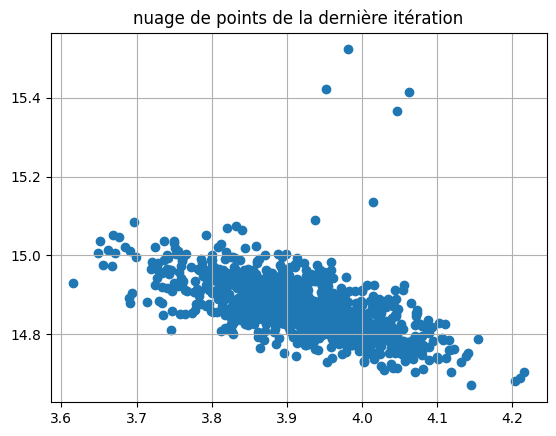

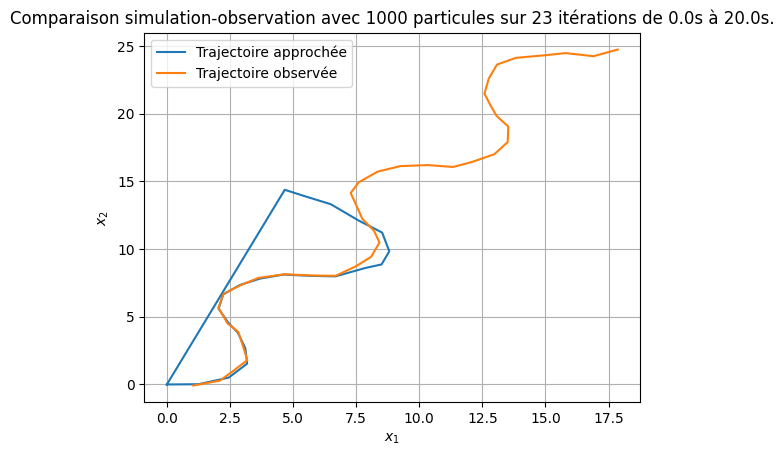

In [1]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_ivp
import scipy.stats as sps
np.random.seed(1234)

N = 1000
n = 5
t0 = 0.
T = 20.
n_obs = 40
pas_obs = (T-t0)/n_obs  # pas d'observation
t_obs = np.linspace(0.5, T, n_obs)  # dates auxquelles on observe
dt = 0.01  # pas de discrétisation pour euler explicite
# perturbation observation
sigma_obs = 0.1
# perturbation évolution
sigma_evo = 0.2
x0 = np.array([0, 0, 0, 2, 0])


def f_traj(t, x):
    v = 2.0
    w = np.sin(t)
    return np.array([v*np.cos(x[2]), v*np.sin(x[2]), w])


# simulation d'une trajectoire continue à haute précision, que l'on considère exacte.
sol_traj = solve_ivp(fun=f_traj, t_span=[
                     t0, T], y0=x0[:3], dense_output=True, t_eval=np.arange(t0, T,dt), rtol=1e-4)


def y_traj(t):
    # on sélectionne les deux premières composantes de la solution "exacte" au temps t : mesure de position exacte
    return sol_traj.sol(t)[:2]


# observations Y
y_obs = y_traj(t_obs)  # shape=(2,n_obs)
# génération des n_obs vecteurs de bruit d'observation associés aux y_t effectivement observés
list_epsi_obs = np.random.normal(0, scale=sigma_obs, size=(n_obs, 2))
y_obs = y_obs + np.transpose(list_epsi_obs)


def f_ext(t, x):
    return np.array([x[3]*np.cos(x[2]), x[3]*np.sin(x[2]), x[4], 0, 0])


# euler explicit
def solve_euler_explicit(f, x0, dt, t0, tf):
    ts, xs = [t0], [x0]
    while ts[-1] < tf:
        t, x = ts[-1], xs[-1]
        t_next, x_next = t + dt, x + dt * f(t, x)
        ts.append(t_next)
        xs.append(x_next)
    return (np.array(ts), np.array(xs))


def predict_euler_explicit(f, x0, dt, t0, tf):
    t, x = t0, x0
    while t < tf:
        t_next, x_next = t + dt, x + dt * f(t, x)
        print(type(t_next), type(x_next), type(tf))
        t = t_next
        x = x_next
    return x


def gaussian_density_1D(v, m, sig):
    """return the evaluation in v of the density function of a random variable following a 1D gaussian law N(m,sig)"""
    return 1/(np.sqrt(2*np.pi)*sig)*np.exp(-0.5*((v-m)/sig)**2)


def q(epsi):
    """return evaluation in x_t of instrumental density of X_t knowing X_t_1 = x_t-1 
    caracterized by noise epsi on acceleration of x_t-1"""
    return gaussian_density_1D(epsi[0], 0, sigma_evo) * gaussian_density_1D(epsi[1], 0, sigma_evo)


def dens_obs(obs, pos):
    """return evaluation in obs (2D vec) of density of Y_t knowing X_t[:2]=pos (2D vec)
    not caracterized by noise epsi on observation of x_t """
    return gaussian_density_1D(obs[0], pos[0], sigma_obs) * gaussian_density_1D(obs[1], pos[1], sigma_obs)


def calc_w(k, x_k, list_epsi_evo):
    """returns non normalized weights at k-th iteration
    x_k is (N,n) and contains all particles (5D) at iteration k
    elements of list_epsi_evo are 2D vectors"""
    w_k = np.zeros((N,), dtype=np.longdouble)
    for i in range(N):
        w_k[i] = dens_obs(y_obs[:, k], x_k[i][:2]) / q(list_epsi_evo[i])
    return w_k  # PAS normalisation


def kalm_prob():
    """stockage AVANT rééchantillonnage"""
    x = [np.array([x0.copy()] * N, dtype=np.longdouble)]  # x.shape=(N,n)
    w0 = np.full((N,), 1/N)  # poids en t=0
    w = [w0.copy()]

    # calcul de x_k,w_k
    for k in range(1, n_obs):
        # rééchantillonnage des particules en k-1
        x_k_1_res = x[-1][np.random.choice(N, N, p=w[-1])]

        # génération des N vecteurs de bruit sur les accélérations associés aux particules en k-1 resampled qu'on fait évoluer
        list_epsi_evo_k = np.random.normal(0, scale=sigma_evo, size=(N, 2))
        # perturbation des accélérations des x_k-1
        x_k_1_res[:, 3:] = x_k_1_res[:, 3:] + list_epsi_evo_k

        # calcul de x_k
        x_k = np.zeros((N, n), dtype=np.longdouble)
        for i in range(N):
            # 1 itération avec euler explicite depuis les x_k-1
            x_k[i] = solve_euler_explicit(
                f_ext, x_k_1_res[i], dt, t_obs[k-1], t_obs[k])[1][-1]
        x.append(x_k)

        # calcul des poids
        w_k = calc_w(k, x[k], list_epsi_evo_k)
        # w.append(w_k/w_k.sum())

        if np.isnan(w_k).any() or (w_k.sum() <= 1.e-200):
            print("on sort à", k)
            break
        else:
            w.append(w_k/w_k.sum())

    return x, w


# calcul nuage
x, w = kalm_prob()

# affichage du nuage de point final
plt.scatter(x[-1][:, 0], x[-1][:, 1])
plt.grid(True)
plt.title("nuage de points de la dernière itération")
plt.show()

# calcul trajectoire
nb_iter = len(x)  # nb d'itérations effectivement calculées
x_m = np.zeros((nb_iter, n), dtype=np.longdouble)
for k in range(nb_iter-1):
    x_m[k] = np.average(x[k], 0, w[k])

# affichage trajectoire
plt.plot(x_m[:, 0], x_m[:, 1], label="Trajectoire approchée")
plt.plot(y_obs[0], y_obs[1], label="Trajectoire observée")
plt.grid(True)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title(
    f'Comparaison simulation-observation avec {N} particules sur {nb_iter} itérations de {t0}s à {T}s.')
plt.legend()
plt.show()

In [13]:
def calc_quant_set(perc,probs):
    """returns the set of indices whoses probabilities in probs are in the quantile a
    probs is np.array((N,))"""
    print(probs.shape)
    qt_value=np.quantile(probs,perc)
    print(qt_value)
    qt_set=[]
    for i in range(N):
        if probs[i] <= qt_value:
            qt_set.append(i)
    return qt_set

qt_set=calc_quant_set(0.025,w[2])
print(qt_set)

def calc_quant_array(a, nb_iter, w):
    """returns for each iteration the sets of particles indices whoses probabilities are in the quantile a"""
    quant=np.zeros((nb_iter,))

(1000,)
1.2525134551510189e-30
[63, 70, 130, 167, 183, 184, 220, 222, 232, 242, 316, 322, 393, 515, 549, 572, 613, 617, 710, 739, 754, 775, 804, 855, 908]


**Question 4. Prédiction** 

Propager les particules jusqu'au temps 21. Les représenter graphiquement. Commenter.

**Question 5. Limitations**

Essayer différentes valeurs d'écarts types d'observation et de perturbation. Commenter.

**Question 6. Amélioration de la loi instrumentale (facultatif)** 

Les performances du filtre particulaire dépendent beaucoup du choix de la densité instrumentale employée. Nous l'avons implémenté avec une simple perturbation des accélérations sans tenir compte de l'observation suivante. Une possibilité est de propager la trajectoire selon le filtre de Kalman étendu entre chacune des observations. Il faudra pour ce faire modifier le code implémenté dans le projet d'équations différentielles pour tenir compte du fait que l'observation n'est pas disponible en chaque pas de temps de discrétisation.